In [1]:
import pandas as pd
import numpy as np
import sklearn
from sklearn.decomposition import TruncatedSVD

import matplotlib.pyplot as plt

In [43]:
df_r = pd.read_csv('goodbooks-10k/ratings.csv')
#df_tr = pd.read_csv('goodbooks-10k/to_read.csv')
df_b = pd.read_csv('goodbooks-10k/books.csv')

df_t = pd.read_csv('goodbooks-10k/tags.csv')
df_bt = pd.read_csv('goodbooks-10k/book_tags.csv')

In [44]:
df_bt

,goodreads_book_id,tag_id,count
0,1,30574,167697
1,1,11305,37174
2,1,11557,34173
3,1,8717,12986
4,1,33114,12716
...,...,...,...
999907,33288638,21303,7
999908,33288638,17271,7
999909,33288638,1126,7
999910,33288638,11478,7


In [19]:
df_r.sort_values(by="user_id", inplace=True)
df_r = df_r.reset_index()
df_r

,index,user_id,book_id,rating
0,0,1,258,5
1,230495,1,35,5
2,230483,1,4691,4
3,230484,1,238,2
4,230485,1,2063,4
...,...,...,...,...
5976474,5404404,53424,2366,4
5976475,5404366,53424,42,5
5976476,5404364,53424,43,5
5976477,5404385,53424,69,4


In [40]:
df_user = df_r[df_r["user_id"] == 1]
for i in range(df_user.shape[0]):
    print(df_b.loc[df_b["book_id"] == df_user["book_id"][i], "original_title"], df_user["rating"][i])
    #print(df_user["book_id"][i])

257    La sombra del viento
Name: original_title, dtype: object 5
34    O Alquimista
Name: original_title, dtype: object 5
4690    West with the Night
Name: original_title, dtype: object 4
237    Running with Scissors
Name: original_title, dtype: object 2
2062    A Year in Provence
Name: original_title, dtype: object 4
915    Reading Lolita in Tehran: A Memoir in Books
Name: original_title, dtype: object 3
4613    The Emperor's Children
Name: original_title, dtype: object 1
110    The Memory Keeper's Daughter
Name: original_title, dtype: object 3
10    The Kite Runner 
Name: original_title, dtype: object 5
1643    Peace Like a River
Name: original_title, dtype: object 5
3888    The Stone Diaries
Name: original_title, dtype: object 3
135    Divine Secrets of the Ya-Ya Sisterhood
Name: original_title, dtype: object 5
6664    Cry to Heaven
Name: original_title, dtype: object 4
32    Memoirs of a Geisha
Name: original_title, dtype: object 4
137    The Scarlet Letter
Name: original_title, d

In [5]:
df_b.columns

Index(['book_id', 'goodreads_book_id', 'best_book_id', 'work_id',
       'books_count', 'isbn', 'isbn13', 'authors', 'original_publication_year',
       'original_title', 'title', 'language_code', 'average_rating',
       'ratings_count', 'work_ratings_count', 'work_text_reviews_count',
       'ratings_1', 'ratings_2', 'ratings_3', 'ratings_4', 'ratings_5',
       'image_url', 'small_image_url'],
      dtype='object')

In [4]:
df_b["title"].head()

0              The Hunger Games (The Hunger Games, #1)
1    Harry Potter and the Sorcerer's Stone (Harry P...
2                              Twilight (Twilight, #1)
3                                To Kill a Mockingbird
4                                     The Great Gatsby
Name: title, dtype: object

In [5]:
df_b.head()

,book_id,goodreads_book_id,best_book_id,work_id,books_count,isbn,isbn13,authors,original_publication_year,original_title,...,ratings_count,work_ratings_count,work_text_reviews_count,ratings_1,ratings_2,ratings_3,ratings_4,ratings_5,image_url,small_image_url
0,1,2767052,2767052,2792775,272,439023483,9.780439e+12,Suzanne Collins,2008.0,The Hunger Games,...,4780653,4942365,155254,66715,127936,560092,1481305,2706317,https://images.gr-assets.com/books/1447303603m...,https://images.gr-assets.com/books/1447303603s...
1,2,3,3,4640799,491,439554934,9.780440e+12,"J.K. Rowling, Mary GrandPré",1997.0,Harry Potter and the Philosopher's Stone,...,4602479,4800065,75867,75504,101676,455024,1156318,3011543,https://images.gr-assets.com/books/1474154022m...,https://images.gr-assets.com/books/1474154022s...
2,3,41865,41865,3212258,226,316015849,9.780316e+12,Stephenie Meyer,2005.0,Twilight,...,3866839,3916824,95009,456191,436802,793319,875073,1355439,https://images.gr-assets.com/books/1361039443m...,https://images.gr-assets.com/books/1361039443s...
3,4,2657,2657,3275794,487,61120081,9.780061e+12,Harper Lee,1960.0,To Kill a Mockingbird,...,3198671,3340896,72586,60427,117415,446835,1001952,1714267,https://images.gr-assets.com/books/1361975680m...,https://images.gr-assets.com/books/1361975680s...
4,5,4671,4671,245494,1356,743273567,9.780743e+12,F. Scott Fitzgerald,1925.0,The Great Gatsby,...,2683664,2773745,51992,86236,197621,606158,936012,947718,https://images.gr-assets.com/books/1490528560m...,https://images.gr-assets.com/books/1490528560s...


# merge ratings and books

In [6]:
#df_r.shape

In [7]:
#df_b.shape

In [8]:
#df = pd.merge(df_r, df_b, on="book_id")

In [9]:
#df.shape

In [10]:
#df.columns

# pivot

In [11]:
df_r = df_r.pivot(index="user_id", columns ="book_id", values="rating")


In [12]:
df_r = df_r.fillna(0)

In [13]:
df_r.shape

(53424, 10000)

In [14]:
df_r.head()

book_id,1,2,3,4,5,6,7,8,9,10,...,9991,9992,9993,9994,9995,9996,9997,9998,9999,10000
user_id,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,4.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,5.0,0.0,0.0,5.0,0.0,0.0,4.0,0.0,5.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,5.0,0.0,4.0,4.0,0.0,4.0,4.0,0.0,5.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# SVD

In [33]:
X = df_r.values.T
print(X.shape)
X

(10000, 53424)


array([[0., 0., 0., ..., 4., 4., 4.],
       [0., 5., 0., ..., 5., 5., 5.],
       [0., 0., 0., ..., 0., 0., 4.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [108]:
"""
Contrary to PCA, this estimator does not center the data before computing the singular value decomposition.
This means it can work with sparse matrices efficiently.

n_components is the desired dimension of output data
"""

SVD = TruncatedSVD(n_components=100, random_state=42)
matrix = SVD.fit_transform(X)
matrix.shape

(10000, 100)

In [109]:
corr = np.corrcoef(matrix)
corr.shape

(10000, 10000)

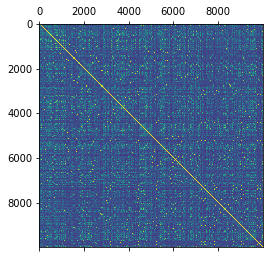

In [110]:
plt.matshow(corr)
plt.show()

# Prediction book

In [116]:
title = df_b["title"]
title_list = list(title)
print(title_list[0:10])

book_title = "The Hunger Games (The Hunger Games, #1)"

book_id = df_b.loc[df_b["title"] == book_title, "book_id"].values[0]
print(book_id)

book_corr  = corr[book_id - 1]
print(list(title[book_corr >= 0.75]))

['The Hunger Games (The Hunger Games, #1)', "Harry Potter and the Sorcerer's Stone (Harry Potter, #1)", 'Twilight (Twilight, #1)', 'To Kill a Mockingbird', 'The Great Gatsby', 'The Fault in Our Stars', 'The Hobbit', 'The Catcher in the Rye', 'Angels & Demons  (Robert Langdon, #1)', 'Pride and Prejudice']
1
['The Hunger Games (The Hunger Games, #1)', 'Catching Fire (The Hunger Games, #2)', 'Mockingjay (The Hunger Games, #3)']
